In [2]:
library(data.table)
house.votes.84 = read.delim("https://raw.githubusercontent.com/chirayukong/infsci2725-fall-2016/master/class-7/house-votes-84.txt")
votes=as.data.table(house.votes.84)
rm(house.votes.84)

summary(votes)

        Party     handicapped_infants water_project_cost_sharing
 democrat  :267   n:236               n:192                     
 republican:168   w: 12               w: 48                     
                  y:187               y:195                     
 adoption_of_the_budget_resolution physician_fee_freeze el_salvador_aid
 n:171                             n:247                n:208          
 w: 11                             w: 11                w: 15          
 y:253                             y:177                y:212          
 religious_groups_in_schools nti_satellite_test_ban aid_to_nicaraguan_contras
 n:152                       n:182                  n:178                    
 w: 11                       w: 14                  w: 15                    
 y:272                       y:239                  y:242                    
 mx_missile immigration synfuels_corporation_cutback education_spending
 n:206      n:212       n:264                        n:233          


Classification tree:
rpart(formula = Party ~ ., data = votes, method = "class", cp = 1e-04)

Variables actually used in tree construction:
[1] adoption_of_the_budget_resolution physician_fee_freeze             
[3] synfuels_corporation_cutback     

Root node error: 168/435 = 0.38621

n= 435 

         CP nsplit rel error xerror     xstd
1 0.8869048      0  1.000000 1.0000 0.060444
2 0.0089286      1  0.113095 0.1131 0.025373
3 0.0001000      3  0.095238 0.1369 0.027782


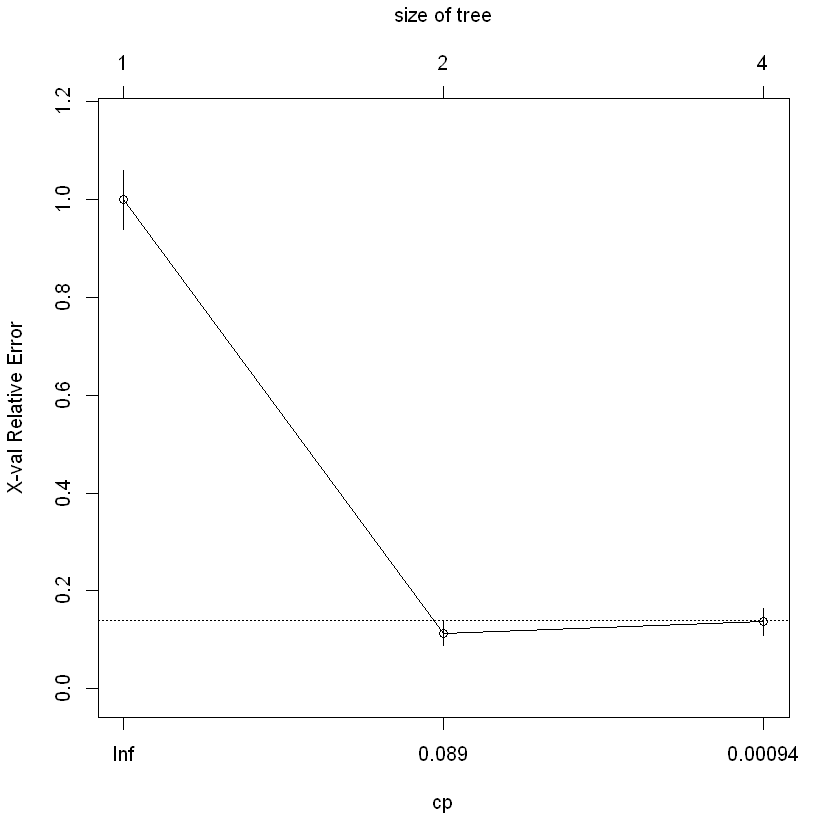

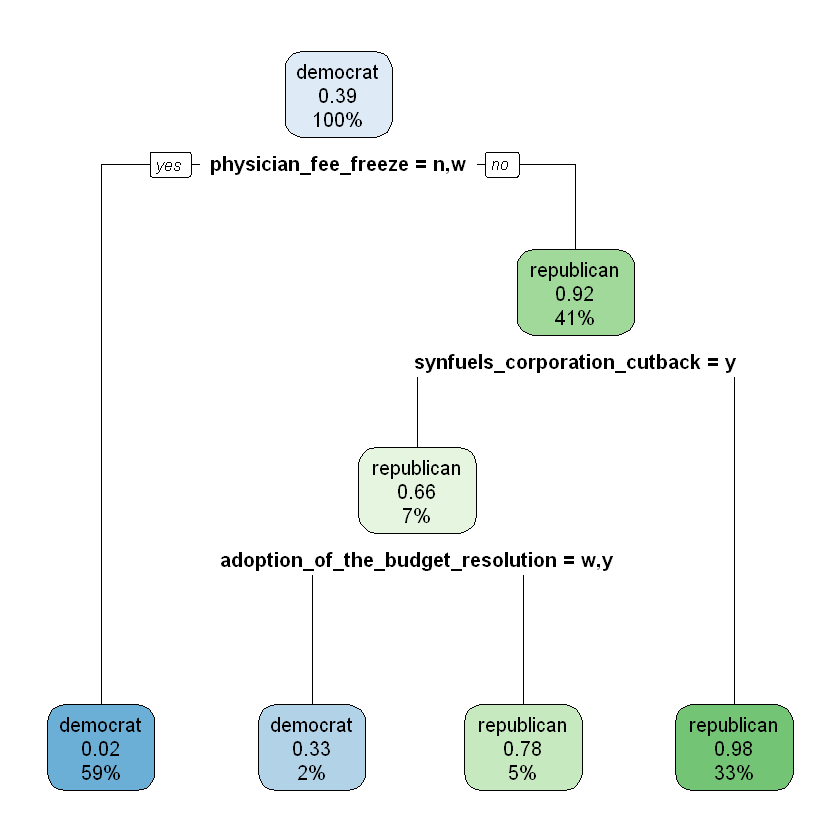

In [3]:
library(rpart)
library(rpart.plot)
rtree1=rpart(Party~., data = votes, method = "class", cp=0.0001)
printcp(rtree1)
plotcp(rtree1)
rpart.plot(rtree1)
origin1=votes[,Party]
prediction1=predict(rtree1,newdata = votes,type = "class")
q1=table(origin1,prediction1)
# calculate accuracy
Total_Acc1=(q1[1,1]+q1[2,2])/(sum(q1))
Sense1=(q1[1,1])/(q1[1,1]+q1[1,2])
Speci1=(q1[2,2])/(q1[2,1]+q1[2,2])



Classification tree:
rpart(formula = Party ~ ., data = train, method = "class", cp = 1e-04)

Variables actually used in tree construction:
[1] export_administration_act_sa physician_fee_freeze        
[3] synfuels_corporation_cutback

Root node error: 138/348 = 0.39655

n= 348 

         CP nsplit rel error  xerror     xstd
1 0.9057971      0  1.000000 1.00000 0.066127
2 0.0072464      1  0.094203 0.10870 0.027454
3 0.0001000      3  0.079710 0.11594 0.028311


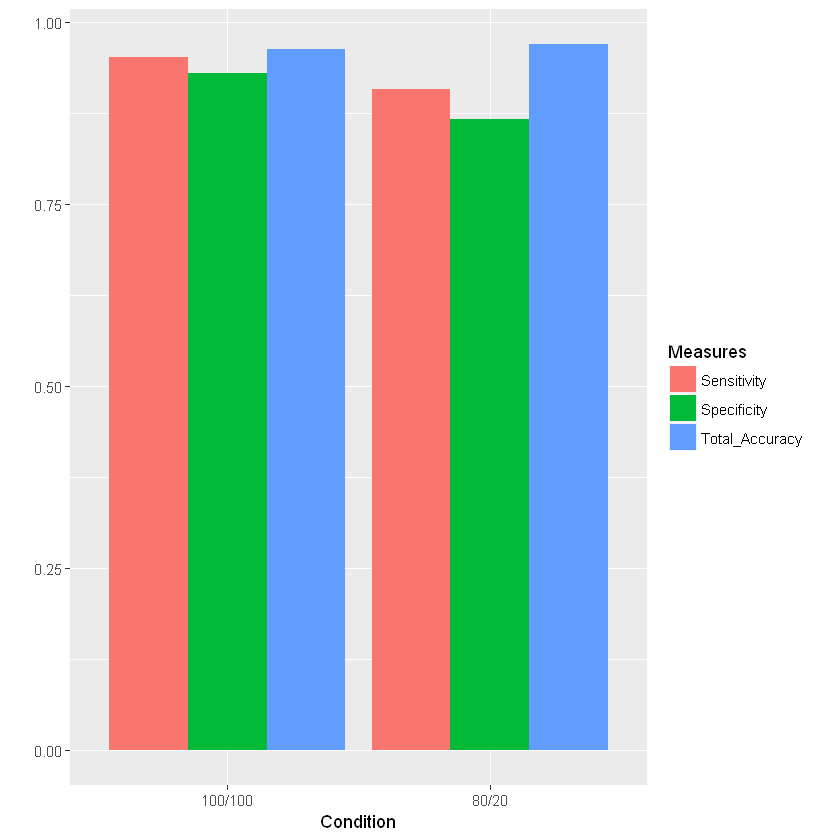

In [4]:
#80/20 solution
set.seed(123)
smp_size= floor(0.8 * nrow(votes))
train_ind=sample(seq_len(nrow(votes)), size = smp_size)
train=votes[train_ind, ] 
test=votes[-train_ind, ]
rtree2=rpart(Party~., data = train, method = "class", cp=0.0001)
printcp(rtree2)
test=as.data.table(test)
origin2=test[,Party]
prediction2=predict(rtree2,newdata = test,type = "class")
q2=table(origin2,prediction2)
Total_Acc2=(q2[1,1]+q2[2,2])/(sum(q2))
Sense2=(q2[1,1])/(q2[1,1]+q2[1,2])
Speci2=(q2[2,2])/(q2[2,1]+q2[2,2])

a2=matrix(c(Total_Acc1,Sense1,Speci1,
            Total_Acc2,Sense2,Speci2),ncol=3)
a2=as.table(a2)
colnames(a2)=c("Total_Accuracy","Sensitivity","Specificity")
rownames(a2)=c("100/100","80/20")
a2=as.data.table(a2)
setnames(a2, c("Condition", "Measures", "Value"))
library(ggplot2)
ggplot(a2, aes(Condition, Value)) +   
  geom_bar(aes(fill = Measures), position = "dodge", stat="identity")+ylab("")



Classification tree:
rpart(formula = Party ~ ., data = train, method = "class", cp = 1e-04)

Variables actually used in tree construction:
[1] export_administration_act_sa physician_fee_freeze        
[3] synfuels_corporation_cutback

Root node error: 138/348 = 0.39655

n= 348 

         CP nsplit rel error  xerror     xstd
1 0.9057971      0  1.000000 1.00000 0.066127
2 0.0072464      1  0.094203 0.10870 0.027454
3 0.0001000      3  0.079710 0.11594 0.028311


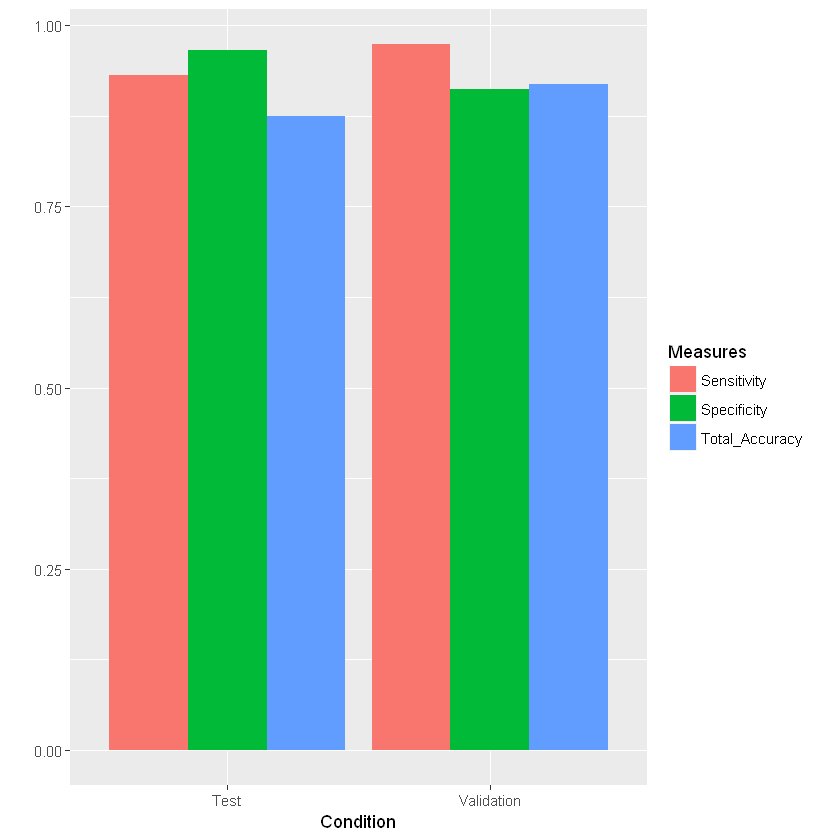

In [5]:
#60/20/20
set.seed(123)
train_ind2<-sample(seq_len(nrow(train)),size=smp_size)
train1<-votes[train_ind,]
test2<-votes[-train_ind,]
smp_size1<-floor(0.75*nrow(train1))
ind<-sample(seq_len(nrow(train1)),size = smp_size1)
train2<-train1[ind,]
validation1<-train1[-ind,]
rtree3=rpart(Party~., data = train2, method = "class", cp=0.0001)
printcp(rtree2)
validation1=as.data.table(validation1)
origin3=validation1[,Party]
prediction3=predict(rtree3,newdata = validation1,type = "class")
test2=as.data.table(test2)
origin4=test2[,Party]
prediction4=predict(rtree3,newdata = test2,type = "class")
q3=table(origin3,prediction3)
q4=table(origin4,prediction4)
Total_Acc3=(q3[1,1]+q3[2,2])/(sum(q3))
Sense3=(q3[1,1])/(q3[1,1]+q3[1,2])
Speci3=(q3[2,2])/(q3[2,1]+q3[2,2])
Total_Acc4=(q4[1,1]+q4[2,2])/(sum(q4))
Sense4=(q4[1,1])/(q4[1,1]+q4[1,2])
Speci4=(q4[2,2])/(q4[2,1]+q4[2,2])

a3=matrix(c(Total_Acc3,Sense3,Speci3,
            Total_Acc4,Sense4,Speci4),ncol=3)
a3=as.table(a3)
colnames(a3)=c("Total_Accuracy","Sensitivity","Specificity")
rownames(a3)=c("Validation","Test")
a3=as.data.table(a3)
setnames(a3, c("Condition", "Measures", "Value"))
ggplot(a3, aes(Condition, Value)) +   
  geom_bar(aes(fill = Measures), position = "dodge", stat="identity")+ylab("")



In [7]:

house.votes.84 <- read.delim("https://raw.githubusercontent.com/chirayukong/infsci2725-fall-2016/master/class-7/house-votes-84.txt")
data<-house.votes.84
  data$Party<-as.factor(data$Party)
  data$handicapped_infants<-as.numeric(data$handicapped_infants)
  data$water_project_cost_sharing <-as.numeric(data$water_project_cost_sharing)
  data$adoption_of_the_budget_resolution<-as.numeric(data$adoption_of_the_budget_resolution)
  data$physician_fee_freeze<-as.numeric(data$physician_fee_freeze)
  data$el_salvador_aid<-as.numeric(data$el_salvador_aid)
  data$religious_groups_in_schools<-as.numeric(data$religious_groups_in_schools)
  data$nti_satellite_test_ban<-as.numeric(data$nti_satellite_test_ban)
  data$aid_to_nicaraguan_contras<-as.numeric(data$aid_to_nicaraguan_contras)
  data$mx_missile<-as.numeric(data$mx_missile)
  data$immigration<-as.numeric(data$immigration)
  data$synfuels_corporation_cutbacbk<-as.numeric(data$synfuels_corporation_cutback)
  data$education_spending<-as.numeric(data$education_spending)
  data$superfund_right_to_sue<-as.numeric(data$superfund_right_to_sue)
  data$crime<-as.numeric(data$crime)
  data$duty_free_exports<-as.numeric(data$duty_free_exports)
  data$export_administration_act_sa<-as.numeric(data$export_administration_act_sa)

## Processing

library(rpart)
num <-nrow(data)
k = 0.2*num
 prediction_set<-NULL
  for(i in 1:k){
        train_set <- data[-i,]
        test_set <- data[i,]
        tree = rpart(Party~., data = train_set, method = "class", cp = 0.00001)
        prediction = predict(tree, newdata = test_set, type = "class")
        prediction_set = rbind(prediction_set, prediction)
        }


##Output


origin <-data$Party
  prediction_set <-as.numeric(prediction_set)
  result <-cbind(prediction_set,origin)
  results <- result[1:87,]
  q1<-as.data.frame(results)
  q1$prediction_set<- as.factor(q1$prediction_set)
  q1$origin<- as.factor(q1$origin)
  table1 <-table(q1$prediction_set,q1$origin)
  acc = (table1[1,1]+table1[2,2])/(sum(table1))
  sense = (table1[1,1])/(table1[1,1]+ table1[1,2])
  speci = (table1[2,2])/(table1[2,1]+table1[2,2])
  acc
  sense
  speci



[1] 0.9655172

[1] 0.9803922

[1] 0.9444444